<a href="https://colab.research.google.com/github/RahulArra/Machine-Learning/blob/main/datasett3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath2 = "/content/drive/MyDrive/Datasets/house_price_train.csv"
df2 = pd.read_csv(filepath2)
df2.drop(labels = ['Id'],axis=1,inplace=True)
print(df2.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     20850

In [ ]:
null_features = [col for col in df2.columns if df2[col].isnull().sum()>0]
df2.drop(labels=null_features,axis=1,inplace=True)

Constant Features

In [ ]:
df2.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Separate features and target
X = df2.drop(labels=['SalePrice'], axis=1)
y = df2['SalePrice']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, dummy_na=False)

# Split the data into training and testing sets
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

print("Shape of X after one-hot encoding:", X.shape)
print("Shape of x_train2:", x_train2.shape)
print("Shape of x_test2:", x_test2.shape)

Shape of X after one-hot encoding: (1460, 215)
Shape of x_train2: (1022, 215)
Shape of x_test2: (438, 215)


In [ ]:
df2.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
constant_features2 = [cols for cols in x_train2.columns if x_train2[cols].nunique() == 1]
print(len(constant_features2))
print(constant_features2)

6
['Condition2_PosA', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'Functional_Sev']


Quasi Constant Features

In [ ]:
quasi_constant_feature = []

for feature in x_train2.columns:
  predominant = (x_train2[feature].value_counts() / np.float64(len(x_train2))).sort_values(ascending=False).values[0]

  if predominant > 0.96:
    quasi_constant_feature.append(feature)

print(quasi_constant_feature)

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin'

In [ ]:
x_train2.drop(labels = constant_features2+quasi_constant_feature , axis=1 , inplace = True)
x_test2.drop(labels = constant_features2+quasi_constant_feature , axis=1 , inplace = True)

Duplicated Features

In [ ]:
duplicated_feat = []

for i in range(0,len(x_train2.columns)):
  col_1 = x_train2.columns[i]
  for col_2 in x_train2.columns[i+1:]:
    if x_train2[col_1].equals(x_train2[col_2]):
      duplicated_feat.append(col_2)

print(duplicated_feat)

[]


Correlation

<Axes: >

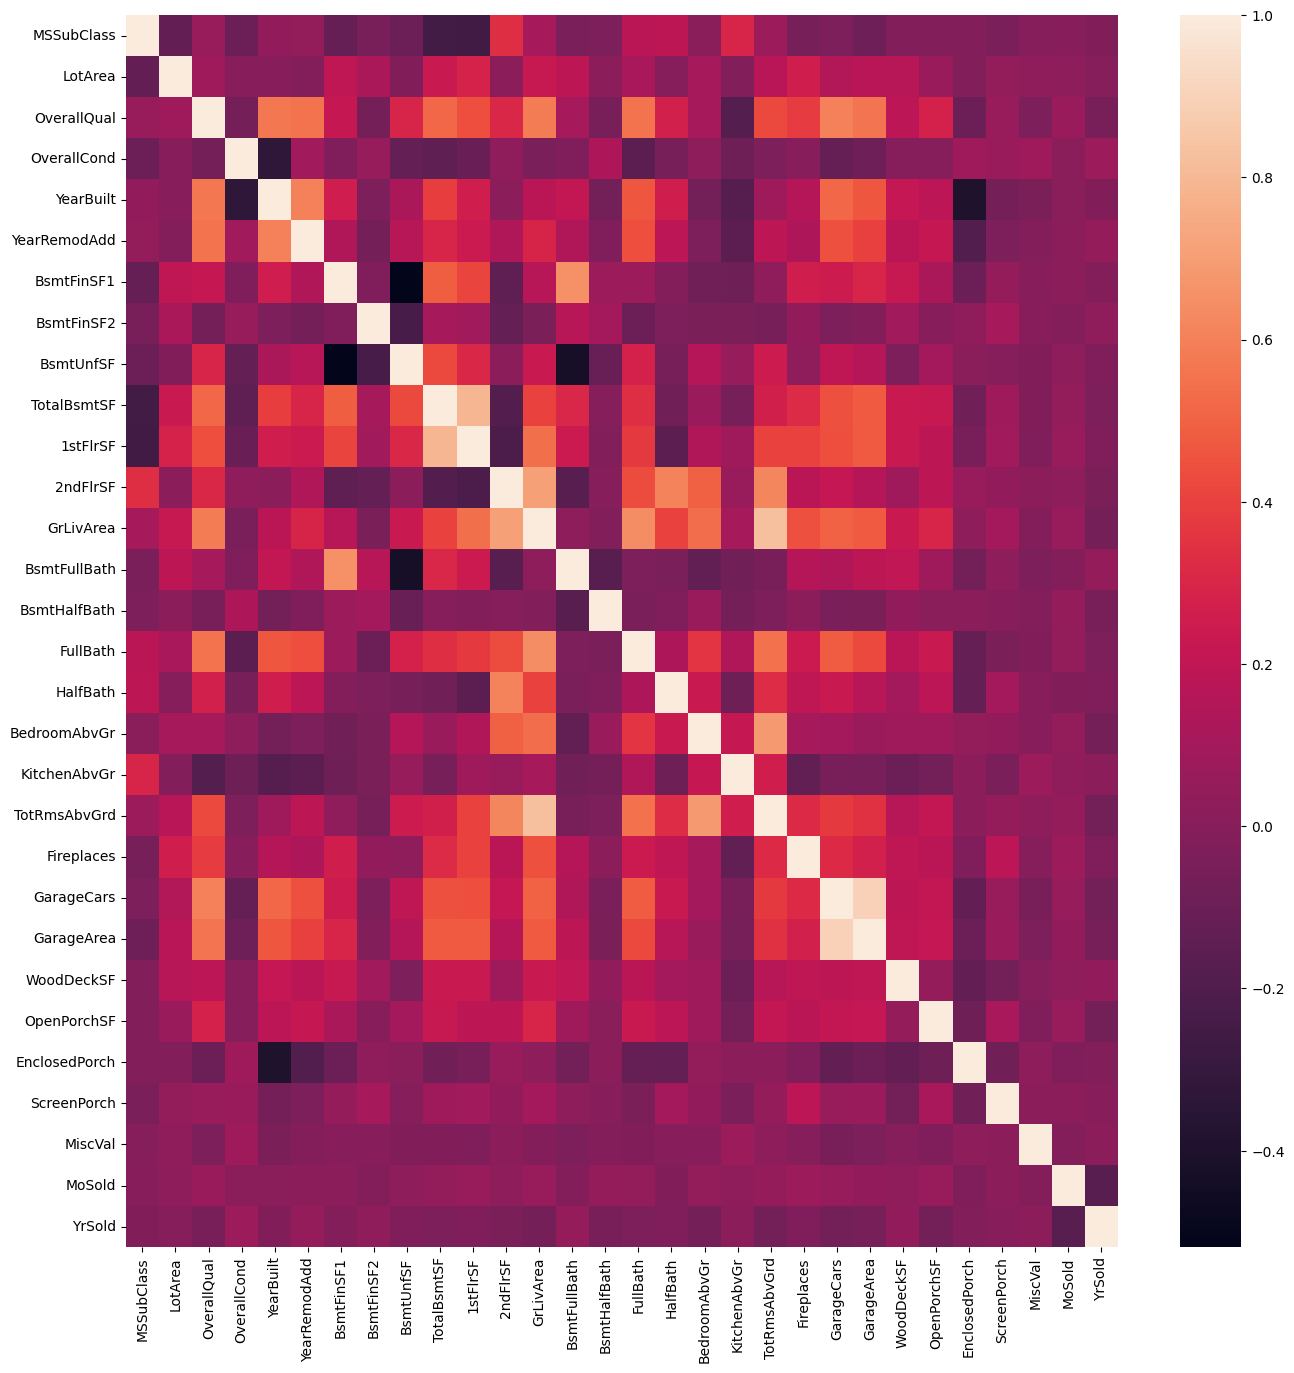

In [ ]:
corrmat = x_train2.select_dtypes(include=np.number).corr()
fig , ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat)

In [ ]:
grouped_feature_ls = []
correlated_features_ls = []
def correlation(dataset , threshold):
  col_corr = set()
  corr_matrix = dataset.select_dtypes(include=np.number).corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

corr_features = correlation(x_train2 , 0.7)
correlated_features = list(set(corr_features))
print(len(correlated_features))

df2 = df2.drop(columns=correlated_features)

4


Mutual Information

In [ ]:
X = df2.drop(columns=['SalePrice'])
Y = df2['SalePrice']

categorical_cols = X.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

mi_scores = mutual_info_classif(X, Y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Info Score': mi_scores})
threshold = 0.01
drop_features = mi_df[mi_df['Mutual Info Score'] < threshold]['Feature']
df2 = df2.drop(columns=drop_features)

Chi Sqaure test

In [ ]:
X = df2.drop(columns=['SalePrice'])
Y = df2['SalePrice']
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

X = X.clip(lower=0)

if Y.dtype == 'object':
    Y = LabelEncoder().fit_transform(Y.astype(str))

chi_score, p_values = chi2(X, Y)
chi_df = pd.DataFrame({'Feature': X.columns, 'Chi Square Score': chi_score, 'P Values': p_values})
drop_features = chi_df[chi_df['P Values'] > 0.05]['Feature']
df2 = df2.drop(columns=drop_features)

ANOVA

In [ ]:
X = df2.drop(columns=['SalePrice'])
y = df2['SalePrice']
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y.astype(str))

X_num = X.select_dtypes(include=['number'])
f_scores, p_values = f_classif(X_num, y)
f_df = pd.DataFrame({'Feature': X_num.columns, 'F-Score': f_scores, 'P-Value': p_values})
drop_features = f_df[f_df['P-Value'] > 0.05]['Feature']
df2 = df2.drop(columns=drop_features)

In [ ]:
df2.columns

Index(['LotArea', 'LotShape', 'Neighborhood', 'HouseStyle', 'Exterior2nd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [ ]:
#splitting the data into 80 : 20
X = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.columns

Index(['LotArea', 'LotShape', 'Neighborhood', 'HouseStyle', 'Exterior2nd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF',
       'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Identify categorical columns in X_train
categorical_cols = X_train.select_dtypes(include='object').columns

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep the remaining numerical columns
)

# Create a pipeline that first preprocesses the data and then fits the Linear Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)
predictions = model.predict(X_test)

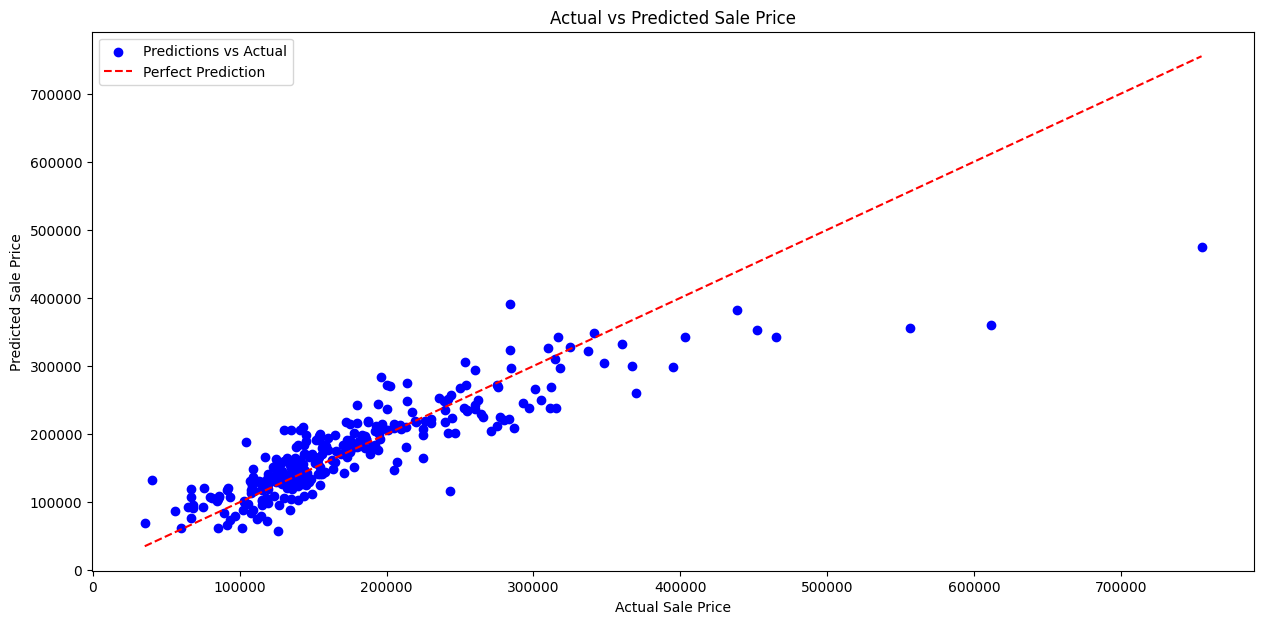

In [ ]:
_=fig,ax = plt.subplots(figsize=(15,7))
_=plt.scatter(y_test, predictions, color="blue", label="Predictions vs Actual")

# Plot a diagonal line representing perfect predictions
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
_=plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle='--', label="Perfect Prediction")

# Show legend
_ = plt.legend()
# Set title
title = "Actual vs Predicted Sale Price"
plt.title(title)
# Sex axis labels
ax.set_xlabel("Actual Sale Price")
_ = ax.set_ylabel("Predicted Sale Price")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions) # Correctly calculate R-squared

# Access the LinearRegression model from the pipeline to get coef_ and intercept_
linear_regressor = model.named_steps['regressor']

print(f"Coefficient: {linear_regressor.coef_[0]:.2f}")
print(f"Intercept: {linear_regressor.intercept_:.2f}")
print(f'Mean Squared Error: {mse:.2f}')
print(f'Coefficient of Determination: {r_squared:.2f}')

Coefficient: 5800.55
Intercept: 66713.59
Mean Squared Error: 1763064962.07
Coefficient of Determination: 0.77


In [ ]:
import numpy as np
import pandas as pd
def append_intercept(X: pd.DataFrame) -> pd.DataFrame:
  """
  Append a column of ones to the beginning of the dataset.
  Parameters
  ----------
  X : pd.DataFrame
  Observed features data
  Returns
  -------
  pd.DataFrame
  Design matrix
  """
  intercept = np.ones((len(X), 1))
  return np.hstack([intercept, X])

def calculate_predictions(X: pd.DataFrame, beta_hat: np.ndarray) -> np.ndarray:
  """
  Returns the predicted values for a test set of observations (X) using a
  vector of the estimated coefficients.
  Parameters
  ----------
  X : pd.DataFrame
  Test features data
  beta_hat : np.ndarray
  Estimated coefficients vector
  Returns
  -------
    np.ndarray
  Estimated coefficients
  """
  X = append_intercept(X)
  # Convert X to a float type to ensure compatibility with matrix multiplication
  X = X.astype(float)
  return X @ beta_hat

In [ ]:
x_train_manual, x_test_manual, y_train_manual, y_test_manual = train_test_split(X,
 y,
random_state=0,
test_size=0.2)
beta_hat = estimate_coefficients(x_train2, y_train2)
y_pred_manual = calculate_predictions(x_test2, beta_hat)
print("Estimated Coefficients (beta_hat):")
print(beta_hat)
print("\nFirst 5 Manual Predictions (y_pred_manual):")
print(y_pred_manual[:5])

Estimated Coefficients (beta_hat):
[-1.45581619e+08  2.39062966e+04  2.14333454e+01 -8.87007984e+05
  3.54387141e+05  6.40568222e+04  1.52172543e+04  1.73215496e+02
 -1.94879957e+02 -4.33454112e+02  5.83361804e+02  9.40893449e+01
  4.42275612e+01  1.72482309e+01 -1.67040730e+05  7.42003164e+05
 -1.09114993e+05 -3.37572917e+04 -1.57136131e+04 -6.84845072e+04
  1.46260871e+04 -1.57619012e+04  2.31007040e+04 -4.96109320e+01
  2.19708892e+01 -6.94711744e+00 -4.90925613e+00  2.27796985e+01
 -3.32359824e-01 -9.43026405e+02 -3.38170183e+03  1.67568059e+04
  1.50919376e+04 -9.64245486e+03 -1.06002556e+04 -1.94127153e+04
 -1.43292206e+03  2.69936220e+02  1.13903873e+04 -1.29144796e+03
  2.92016510e+04  3.75220293e+04  4.10446109e+02 -1.38953053e+04
 -1.92327535e+04 -1.97291142e+04 -1.01803410e+04 -1.56852653e+04
  8.23255218e+03 -9.39150119e+03 -1.09477493e+04 -1.06785289e+04
  7.86966974e+03  3.70683721e+03  1.83088262e+04  1.10276764e+04
  2.97267861e+03 -8.05092475e+01  1.20701218e+03 -9.154

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error for the manual model
mse_manual = mean_squared_error(y_test2, y_pred_manual)
print(f"Manual Model Mean Squared Error: {mse_manual}")

# Calculate R-squared for the manual model
r2_manual = r2_score(y_test2, y_pred_manual)
print(f"Manual Model R-squared: {r2_manual}")

Manual Model Mean Squared Error: 3774644541528.1016
Manual Model R-squared: -554.9948888361888
